# Processing workflow with MTpy-v2

Now that we have seen to make MTH5 files and use Aurora, we can use a slightly different workflow using `mtpy-v2`.  

In [1]:
import warnings
from pathlib import Path
from loguru import logger
import pandas as pd

from mtpy.processing import AuroraProcessing

warnings.filterwarnings("ignore")

In [2]:
# survey_dir = Path(r"c:\\Users\\jpeacock\\OneDrive - DOI\\mt\\mt_short_course\\data\\phx")
survey_dir = Path().cwd().parent.parent.joinpath("data", "timeseries", "phoenix")

edi_path = survey_dir.joinpath("EDI_Files_aurora")
edi_path.mkdir(exist_ok=True)

# band_file = r"c:\\Users\\jpeacock\\OneDrive - DOI\\MTData\\bandset.cfg"
band_file = Path().cwd().parent.joinpath("aurora", "bs_256_29.cfg")

# Or try the alternative band file
band_file = Path().cwd().parent.parent.joinpath("data", "transfer_functions", "bs_eight_level.cfg")

# this is how the different transfer functions will be merged.
merge_dict = {
    150: {"period_min": 1.0 / 30, "period_max": 10000},
    24000: {"period_min": 1.0 / 8000, "period_max": 1.0 / 31},
}

In [3]:
ap = AuroraProcessing(merge_dictionary=merge_dict)

# ap.local_mth5_path = Path(r"c:\Users\jpeacock\OneDrive - DOI\mt\mt_short_course\data\phx\9043\phx_9043.h5")
# ap.remote_mth5_path = Path(r"c:\Users\jpeacock\OneDrive - DOI\mt\mt_short_course\data\phx\remote\remote_02.h5")
ap.local_mth5_path = survey_dir.joinpath("from_phoenix_9043.h5")
ap.remote_mth5_path = survey_dir.joinpath("from_phoenix_remote.h5")

ap.local_station_id = "9043"
ap.remote_station_id = "1003"

ap.run_summary = ap.get_run_summary()

2024-10-10T14:04:49.524821-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\Users\jpeacock\OneDrive - DOI\mt\mt_short_course\data\phx\9043\phx_9043.h5
2024-10-10T14:04:49.981028-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\Users\jpeacock\OneDrive - DOI\mt\mt_short_course\data\phx\remote\remote_02.h5


In [4]:
ap.run_summary.mini_summary

,survey,station,run,start,end,duration
0,MIST,9043,sr150_0001,2024-03-28 14:45:58+00:00,2024-03-29 10:04:39.993333333+00:00,69521.993333
1,MIST,9043,sr24k_0001,2024-03-28 21:46:42+00:00,2024-03-28 21:46:42.999958333+00:00,0.999958
2,MIST,9043,sr24k_0002,2024-03-28 22:40:42+00:00,2024-03-28 22:40:42.999958333+00:00,0.999958
3,MIST,9043,sr24k_0003,2024-03-28 23:34:42+00:00,2024-03-28 23:34:42.999958333+00:00,0.999958
4,MIST,9043,sr24k_0004,2024-03-29 00:28:42+00:00,2024-03-29 00:28:42.999958333+00:00,0.999958
5,MIST,9043,sr24k_0005,2024-03-29 01:22:42+00:00,2024-03-29 01:22:42.999958333+00:00,0.999958
6,MIST,9043,sr24k_0006,2024-03-29 02:16:42+00:00,2024-03-29 02:16:42.999958333+00:00,0.999958
7,MIST,9043,sr24k_0007,2024-03-29 03:10:42+00:00,2024-03-29 03:10:42.999958333+00:00,0.999958
8,MIST,9043,sr24k_0008,2024-03-29 04:04:42+00:00,2024-03-29 04:04:42.999958333+00:00,0.999958
9,MIST,9043,sr24k_0009,2024-03-29 04:58:42+00:00,2024-03-29 04:58:42.999958333+00:00,0.999958


## Create Processing Objects

There are a few unique things with this data set that we need to take into account when processing.

1. The remote only has data for 150 samples/second and not 24k, therefore we need to account for that in the `KernelDataset` 
2. These data use a different nomenclature than the default.  Instead of ["ex", "ey", "hx", "hy", "hz"] the data uses ["e1", "e2", "h1", "h2", "h3"].  We can change this in the `Config` object.

Internally in `AuroraProcessing` the windowing parameters are adjusted based on the sample rate, but we will demonstrate how you might change the windowing and any other parameters in the decimations of the `Config` object.

### 24k Hz Data

In [5]:
ap._remote_station_id = None
kds_24k = ap.create_kernel_dataset(
    local_station_id="9043",
    remote_station_id=None,
    sample_rate=24000
    )

config_24k = ap.create_config(kds_24k, emtf_band_file=band_file)
config_24k.channel_nomenclature.ex = "e1"
config_24k.channel_nomenclature.ey = "e2"
config_24k.channel_nomenclature.hx = "h1"
config_24k.channel_nomenclature.hy = "h2"
config_24k.channel_nomenclature.hz = "h3"

for decimation in config_24k.decimations:
        # because we are only using a local station need to use the RME estimator.
        decimation.estimator.engine = "RME"
        decimation.window.type = "dpss"
        decimation.window.additional_args = {"alpha": 2.5}
        decimation.output_channels = ["e1", "e2", "h3"]
        decimation.input_channels = ["h1", "h2"]
        decimation.reference_channels = ["h1", "h2"]

        # here is where you would change windowing parameters
        # decimation.window.overlap = 64
        # decimation.window.num_samples = 128

2024-10-10T14:04:50.033301-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column fc, adding and setting dtype to <class 'pandas._libs.missing.NAType'>.
2024-10-10T14:04:50.033301-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column remote, adding and setting dtype to <class 'bool'>.
2024-10-10T14:04:50.042487-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column run_dataarray, adding and setting dtype to <class 'NoneType'>.
2024-10-10T14:04:50.044503-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column stft, adding and setting dtype to <class 'NoneType'>.
2024-10-10T14:04:50.045495-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column mth5_obj, adding and setting dtype to <class 'NoneType'>.


### 150 Hz Data

In [6]:
kds_150 = ap.create_kernel_dataset(
    local_station_id="9043",
    remote_station_id="1003",
    sample_rate=150
    )

config_150 = ap.create_config(kds_150, emtf_band_file=band_file)
config_150.channel_nomenclature.ex = "e1"
config_150.channel_nomenclature.ey = "e2"
config_150.channel_nomenclature.hx = "h1"
config_150.channel_nomenclature.hy = "h2"
config_150.channel_nomenclature.hz = "h3"

for decimation in config_150.decimations:
        decimation.window.type = "dpss"
        decimation.window.additional_args = {"alpha": 2.5}
        decimation.output_channels = ["e1", "e2", "h3"]
        decimation.input_channels = ["h1", "h2"]
        decimation.reference_channels = ["h1", "h2"]

        # here is where you would change windowing parameters
        # decimation.window.overlap = 64
        # decimation.window.num_samples = 128 

2024-10-10T14:04:50.127927-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column fc, adding and setting dtype to <class 'pandas._libs.missing.NAType'>.
2024-10-10T14:04:50.127927-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column remote, adding and setting dtype to <class 'bool'>.
2024-10-10T14:04:50.127927-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column run_dataarray, adding and setting dtype to <class 'NoneType'>.
2024-10-10T14:04:50.127927-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column stft, adding and setting dtype to <class 'NoneType'>.
2024-10-10T14:04:50.142500-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column mth5_obj, adding and setting dtype to <class 'NoneType'>.


### Create Processing Dictionary

Now that we have created unique objects for each sample rate, we need to aggregate these into a dictionary that can be input into `AuroraProcessing`

In [7]:
processing_dict = {
    150: {"config": config_150, "kernel_dataset": kds_150},
    24000: {"config": config_24k, "kernel_dataset": kds_24k}
    }

## Process Data
This will the various sample rates, create a transfer function for each and then merge them according to the `merge_dict`.

In [8]:

tf_processed = ap.process(processing_dict=processing_dict)

2024-10-10T14:04:50.259307-0700 | INFO | aurora.pipelines.transfer_function_kernel | show_processing_summary | Processing Summary Dataframe:
2024-10-10T14:04:50.266907-0700 | INFO | aurora.pipelines.transfer_function_kernel | show_processing_summary | 
        duration  has_data  n_samples         run station survey       run_hdf5_reference   station_hdf5_reference    fc  remote  stft mth5_obj dec_level  dec_factor  sample_rate  window_duration  num_samples_window  num_samples  num_stft_windows
0   69521.993333      True   26352000  sr150_0001    1003   MIST  <HDF5 object reference>  <HDF5 object reference>  <NA>    True  None     None         0         1.0   150.000000         0.853333                 128   10428298.0          162941.0
1   69521.993333      True   26352000  sr150_0001    1003   MIST  <HDF5 object reference>  <HDF5 object reference>  <NA>    True  None     None         1         4.0    37.500000         3.413333                 128    2607074.0           40734.0
2   69

## Processed Data

Now the data have processed and we can have a look at the results.  

First have a look at what the out put is.  It is a dictionary with keys as the sample rate and values as more dictionaries with information on if the sample rate was properly processed and if it was the transfer function as an `mtpy.MT` object.

Notice that there are 3 entries in the dictionary with one for `"combined"` which is the combined transfer function of the various sample rates you processed.

In [9]:
tf_processed

{150: {'processed': True,
  'tf': TF( survey='MIST', station='9043', latitude=33.05, longitude=-115.98, elevation=-47.76 )},
 24000: {'processed': True,
  'tf': TF( survey='MIST', station='9043', latitude=33.05, longitude=-115.98, elevation=-47.76 )},
 'combined': {'processed': True,
  'tf': TF( survey='MIST', station='9043', latitude=33.05, longitude=-115.98, elevation=-47.76 )}}

### Plot The Combined Response

Now lets plot the response. Including all 4 components and the induction vectors.

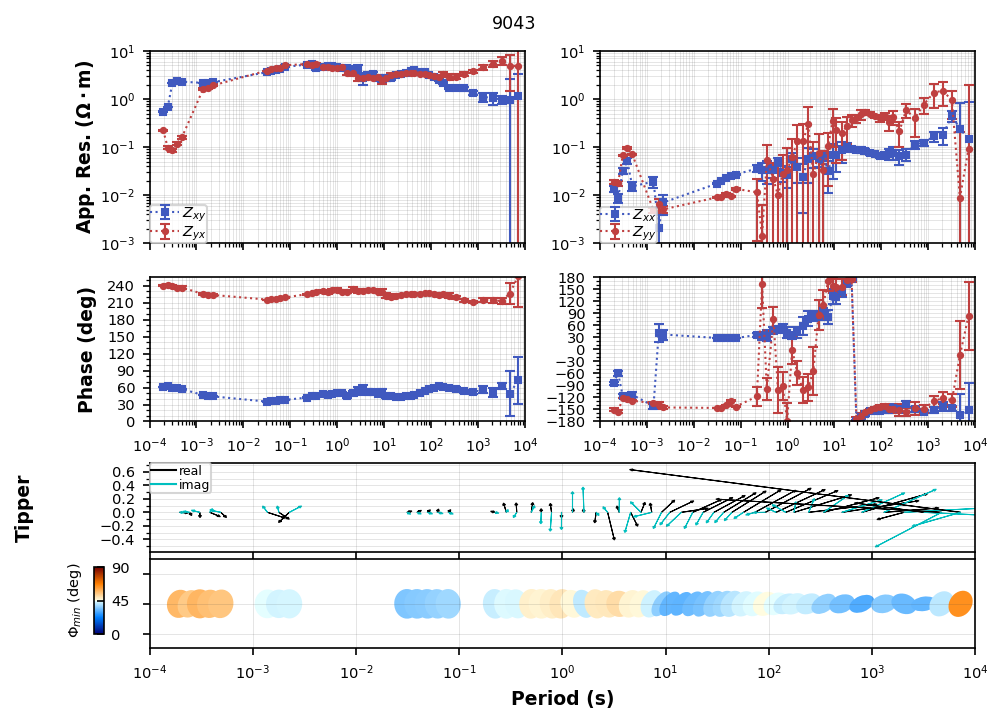

Plotting PlotMTResponse

In [10]:
tf_processed["combined"]["tf"].plot_mt_response(plot_num=2)

#### Uh-oh

Looks like there was a flipped channel.  Which one do you think it was?

We can flip the channel in the transfer function by using `flip_phase`.

In [13]:
tf_processed["combined"]["tf"].flip_phase(zyx=True, zyy=True, tzy=True, inplace=True)

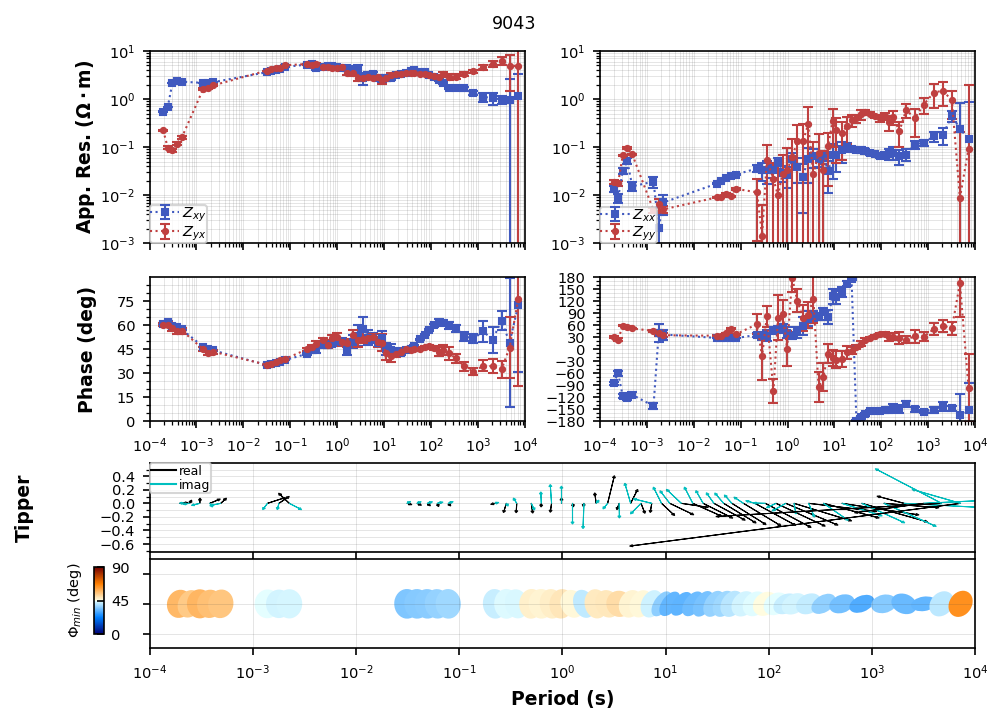

Plotting PlotMTResponse

In [14]:
tf_processed["combined"]["tf"].plot_mt_response(plot_num=2)